In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


In [12]:
df = pd.read_csv(r'C:\Users\OS\Desktop\Workspace\hapt\Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
ohe = OneHotEncoder(sparse=False)
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

df1 = ohe.fit_transform(df[columns_to_encode])


df1 = pd.concat([df.drop(columns_to_encode, axis=1), pd.DataFrame(df1, columns=ohe.get_feature_names_out(columns_to_encode))], axis=1)

C:\Users\OS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2 = df1[(df1['price'] >= lower_bound) & (df1['price'] <= upper_bound)]

In [5]:
columns_to_drop = ['mainroad_no', 'guestroom_no', 'basement_no', 'hotwaterheating_no', 'airconditioning_no', 'prefarea_no']
df3 = df2.drop(columns_to_drop,axis=1)

In [6]:
df3

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16,9100000,6600,4,2,2,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
17,8960000,8500,3,2,4,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
18,8890000,4600,3,2,2,2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19,8855000,6420,3,2,2,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


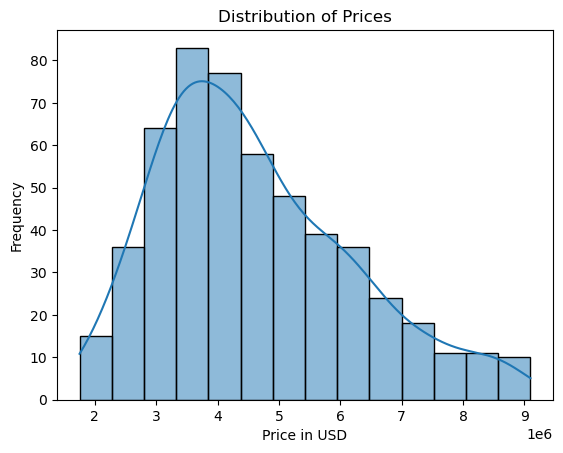

In [7]:
#see the trend of price
sns.histplot(df3['price'],kde = True)
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

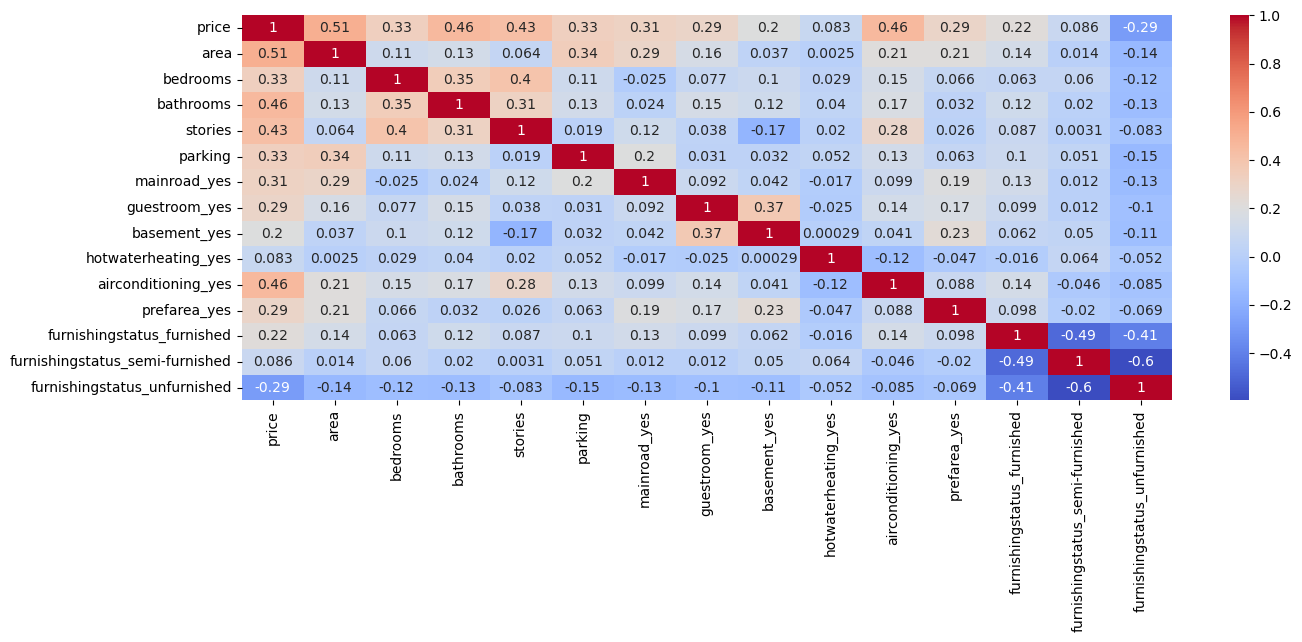

In [8]:
#create a heatmap to see the correlation between values
plt.figure(figsize = (15,5))
sns.heatmap(df3.corr(), cmap="coolwarm", annot=True) 
plt.show()

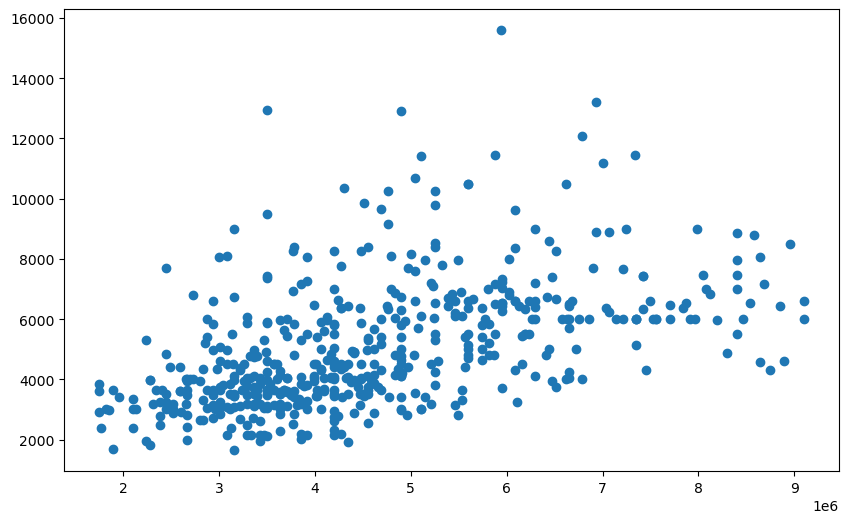

In [9]:
#see the correlation between price and area
plt.figure(figsize = (10,6))
plt.scatter(df3['price'],df3['area'])
plt.show()

In [10]:
X = df3.drop('price', axis=1)
y = df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 918697.6711635431


In [11]:
new_house = pd.DataFrame([[7420,4,2,3,2,1,0,0,0,1,1,1,0,0]], columns=['area','bedrooms','bathrooms','stories','parking','mainroad_yes', 'guestroom_yes',  'basement_yes', 'hotwaterheating_yes','airconditioning_yes','prefarea_yes',  'furnishingstatus_furnished','furnishingstatus_semi-furnished',  'furnishingstatus_unfurnished' ])
predicted_price = model.predict(new_house)
predicted_price = round(predicted_price[0],2)
print(f"Predicted price: {predicted_price}")


Predicted price: 7769438.6
